<a href="https://colab.research.google.com/github/manal201/HomeWork/blob/main/HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EL KACHACH Manal 114855

BOUKAFRI Imane 115462


**Objective**

The goal of this homework is to train a Convolutional Neural Network (CNN) to perform a binary classification task on the CIFAR10 dataset. Specifically, the task is to classify objects into two categories:

Can Fly (class 1): This category includes objects that can fly, such as birds and airplanes.

Cannot Fly (class 0): This category includes objects that cannot fly, such as frogs, deer, trucks, etc.


In [1]:
pip install tensorflow keras numpy matplotlib scikit-learn


In [2]:
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [3]:
# Convert pixel values to floats and normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Define class labels
FLYING_CLASSES = [0, 2]  # Classes corresponding to birds (class 2) and airplanes (class 0)

# Create binary labels
y_train_binary = (y_train == 2) | (y_train == 0)
y_test_binary = (y_test == 2) | (y_test == 0)

In [5]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data (optional if not done already)
X_train, X_val, y_train_binary, y_val_binary = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# Display shapes of the split datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_binary, epochs=10, validation_data=(X_val, y_val_binary))

Epoch 1/10
1250/1250 [==============================] - 63s 49ms/step - loss: 0.4166 - accuracy: 0.8273 - val_loss: 0.3632 - val_accuracy: 0.8481
Epoch 2/10
1250/1250 [==============================] - 78s 62ms/step - loss: 0.3470 - accuracy: 0.8587 - val_loss: 0.3357 - val_accuracy: 0.8638
Epoch 3/10
1250/1250 [==============================] - 57s 45ms/step - loss: 0.3157 - accuracy: 0.8723 - val_loss: 0.3304 - val_accuracy: 0.8611
Epoch 4/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.2929 - accuracy: 0.8831 - val_loss: 0.3190 - val_accuracy: 0.8736
Epoch 5/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.2760 - accuracy: 0.8882 - val_loss: 0.3038 - val_accuracy: 0.8740
Epoch 6/10
1250/1250 [==============================] - 78s 62ms/step - loss: 0.2573 - accuracy: 0.8964 - val_loss: 0.2877 - val_accuracy: 0.8868
Epoch 7/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.2405 - accuracy: 0.9047 - val_loss: 0.2894 -

In [9]:
# Predict probabilities for each class
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype('int32')

# Calculate evaluation metrics and confusion matrix
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


313/313 [==============================] - 6s 16ms/step
Accuracy: 0.8779
Precision: 0.699641209636084
Recall: 0.6825
F1 Score: 0.6909643128321944
Confusion Matrix:
 [[7414  586]
 [ 635 1365]]


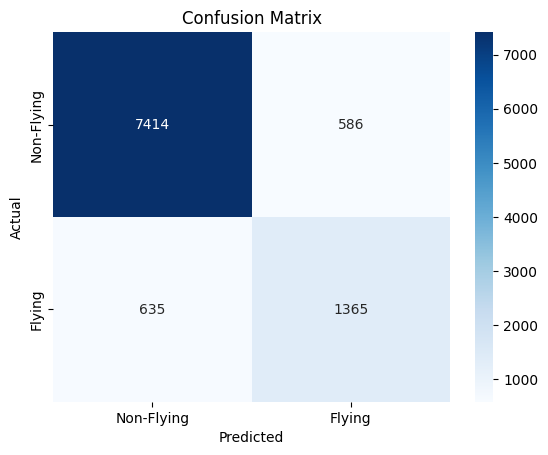

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Flying", "Flying"], yticklabels=["Non-Flying", "Flying"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()